In [ ]:
!pip install  empiricaldist==0.6.7 statsmodels==0.13.5  pyjanitor==0.23.1 session-info


In [ ]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

In [ ]:
df=  pd.read_csv('data2.csv', delimiter=',', encoding='latin-1')
df.head(2)

,Mes,Tipo,Cedula,Solicitante,Porcentaje,M_Factura,M_Aportado,M_USD,Veces atendido,Sexo,...,C_Laboral,Motivo,Causa,Exámen 1,Exámen 2,Exámen 3,Exámen 4,Exámen 5,Exámen 6,Exámen 7
0,JULIO,V-,"3,125,366",LUISA MARIA MELO DE FERNANDEZ,100,1120.0,1120.0,40.22,1,Femenino,...,Desocupado /Sin trabajo,Pesq. / Diagnóstico de enfermedad,Cardiovasculares,LAB (Bs),CONSULTAS (Bs.),Med. Interna,NaN,NaN,NaN,NaN
1,JULIO,V-,"2,213,499",JUAN MANUEL FERNANDEZ PIÑANGO,100,1120.0,1120.0,40.22,1,Masculino,...,Desocupado /Sin trabajo,Pesq. / Diagnóstico de enfermedad,Cardiovasculares,LAB (Bs),CONSULTAS (Bs.),Med. Interna,NaN,NaN,NaN,NaN


## ¿Qué tipo de dato son las variables del conjunto de datos?

In [ ]:
df.dtypes

Mes                object
Tipo               object
Cedula             object
Solicitante        object
Porcentaje          int64
M_Factura         float64
M_Aportado        float64
M_USD             float64
Veces atendido      int64
Sexo               object
Edad                int64
Rango_Edad         object
Estado             object
Embarazada         object
Hogar               int64
C_Laboral          object
Motivo             object
Causa              object
Exámen 1           object
Exámen 2           object
Exámen 3           object
Exámen 4           object
Exámen 5           object
Exámen 6           object
Exámen 7           object
dtype: object

### ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [ ]:
df.dtypes.value_counts()

object     18
int64       4
float64     3
dtype: int64

### ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [ ]:
df.shape

(838, 25)

### ¿Existen valores nulos explícitos en el conjunto de datos?

In [ ]:
df.isna().any()

Mes               False
Tipo              False
Cedula            False
Solicitante       False
Porcentaje        False
M_Factura         False
M_Aportado        False
M_USD             False
Veces atendido    False
Sexo              False
Edad              False
Rango_Edad        False
Estado            False
Embarazada        False
Hogar             False
C_Laboral         False
Motivo            False
Causa             False
Exámen 1          False
Exámen 2           True
Exámen 3           True
Exámen 4           True
Exámen 5           True
Exámen 6           True
Exámen 7           True
dtype: bool

### De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [ ]:
df.isnull().sum()

Mes                 0
Tipo                0
Cedula              0
Solicitante         0
Porcentaje          0
M_Factura           0
M_Aportado          0
M_USD               0
Veces atendido      0
Sexo                0
Edad                0
Rango_Edad          0
Estado              0
Embarazada          0
Hogar               0
C_Laboral           0
Motivo              0
Causa               0
Exámen 1            0
Exámen 2          482
Exámen 3          599
Exámen 4          715
Exámen 5          810
Exámen 6          824
Exámen 7          834
dtype: int64

### ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [ ]:
df.isnull().sum().sum()

4264

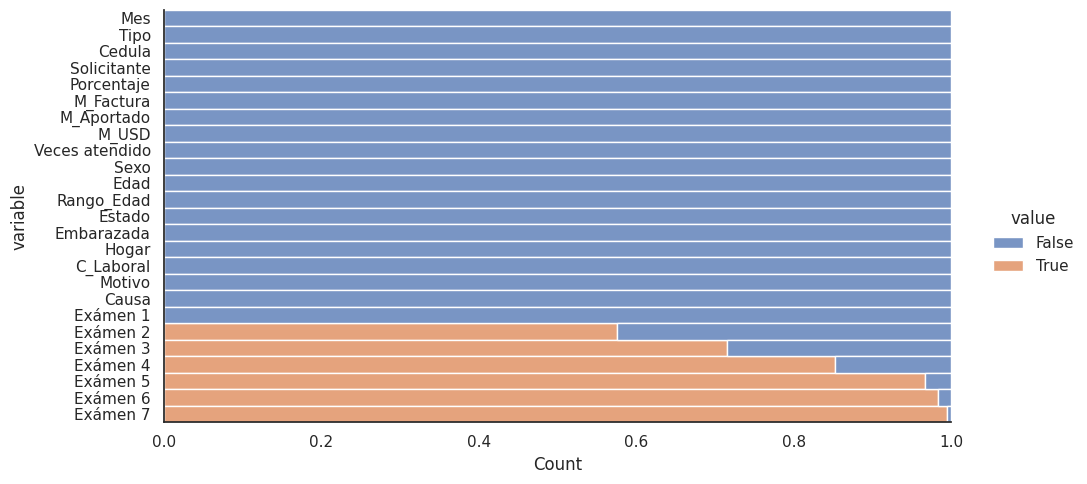

In [ ]:
df.isnull().melt().pipe(lambda df: (sns.displot(data=df,y='variable',hue='value',multiple = 'fill', aspect=2)))

## ¿Qué estadísticos describen el conjunto de datos?

In [ ]:
df.describe(include = 'all')

,Mes,Tipo,Cedula,Solicitante,Porcentaje,M_Factura,M_Aportado,M_USD,Veces atendido,Sexo,...,C_Laboral,Motivo,Causa,Exámen 1,Exámen 2,Exámen 3,Exámen 4,Exámen 5,Exámen 6,Exámen 7
count,838,838,838,838,838.000000,838.000000,838.000000,838.000000,838.0,838,...,838,838,838,838,356,239,123,28,14,4
unique,3,2,837,838,NaN,NaN,NaN,NaN,NaN,2,...,4,2,18,13,20,15,12,8,4,2
top,SEPTIEMBRE,V-,"15,175,593",LUISA MARIA MELO DE FERNANDEZ,NaN,NaN,NaN,NaN,NaN,Femenino,...,Desocupado /Sin trabajo,Seg. /Control de enfermedad,Reproductivas,BIOPSIA (Bs),BIOPSIA (Bs),CONSULTAS (Bs.),Ginecología,CONSULTAS (Bs.),Ginecología,Ginecología
freq,348,834,2,1,NaN,NaN,NaN,NaN,NaN,672,...,392,452,354,207,102,74,65,8,5,2
mean,NaN,NaN,NaN,NaN,99.015513,1186.436897,1154.829714,36.415955,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,6.091967,1014.175800,964.237218,30.701612,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,25.000000,59.010000,59.010000,1.870000,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,100.000000,387.480000,387.480000,12.000000,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,100.000000,893.000000,891.425000,28.000000,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,100.000000,1701.000000,1699.500000,50.000000,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Solo las numéricas

In [ ]:
df.describe(include=[np.number])

,Porcentaje,M_Factura,M_Aportado,M_USD,Veces atendido,Edad,Hogar
count,838.000000,838.000000,838.000000,838.000000,838.0,838.000000,838.000000
mean,99.015513,1186.436897,1154.829714,36.415955,1.0,47.250597,4.068019
std,6.091967,1014.175800,964.237218,30.701612,0.0,21.260780,2.310726
min,25.000000,59.010000,59.010000,1.870000,1.0,0.000000,1.000000
25%,100.000000,387.480000,387.480000,12.000000,1.0,31.000000,3.000000
50%,100.000000,893.000000,891.425000,28.000000,1.0,48.000000,4.000000
75%,100.000000,1701.000000,1699.500000,50.000000,1.0,63.000000,5.000000
max,100.000000,5310.660000,5310.660000,176.000000,1.0,95.000000,20.000000


### Solo categoricas I

In [ ]:
df.describe(include=object)

,Mes,Tipo,Cedula,Solicitante,Sexo,Rango_Edad,Estado,Embarazada,C_Laboral,Motivo,Causa,Exámen 1,Exámen 2,Exámen 3,Exámen 4,Exámen 5,Exámen 6,Exámen 7
count,838,838,838,838,838,838,838,838,838,838,838,838,356,239,123,28,14,4
unique,3,2,837,838,2,4,7,3,4,2,18,13,20,15,12,8,4,2
top,SEPTIEMBRE,V-,"15,175,593",LUISA MARIA MELO DE FERNANDEZ,Femenino,50 o más,Distrito Capital,No,Desocupado /Sin trabajo,Seg. /Control de enfermedad,Reproductivas,BIOPSIA (Bs),BIOPSIA (Bs),CONSULTAS (Bs.),Ginecología,CONSULTAS (Bs.),Ginecología,Ginecología
freq,348,834,2,1,672,403,278,830,392,452,354,207,102,74,65,8,5,2


## Conteos

In [ ]:
df.columns

Index(['Mes', 'Tipo', 'Cedula', 'Solicitante', 'Porcentaje', 'M_Factura',
       'M_Aportado', 'M_USD', 'Veces atendido', 'Sexo', 'Edad', 'Rango_Edad',
       'Estado', 'Embarazada', 'Hogar', 'C_Laboral', 'Motivo', 'Causa',
       'Exámen 1', 'Exámen 2', 'Exámen 3', 'Exámen 4', 'Exámen 5', 'Exámen 6',
       'Exámen 7'],
      dtype='object')

### Cualitativas

### Mes

<ipython-input-75-dbb557d04365>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Mes', data=df, palette='Set2')


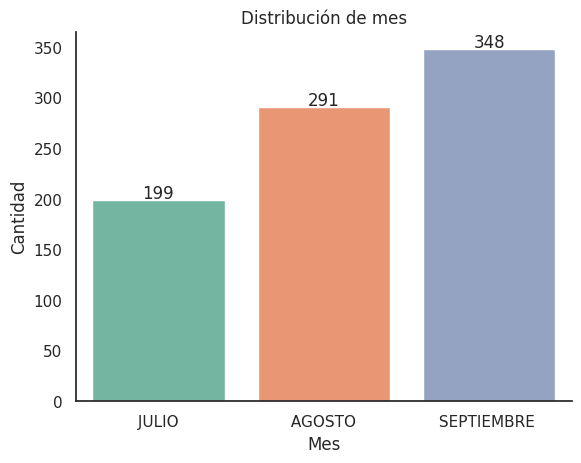

In [ ]:
# Establecer el tema de ggplot2 con un fondo blanco
sns.set(style="white")

# Crear el gráfico de barras utilizando ggplot2 y el tema theme_minimal()
ax = sns.countplot(x='Mes', data=df, palette='Set2')


# Opcional: Agregar etiquetas y título al gráfico
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Distribución de mes')
# Eliminar el borde del gráfico
sns.despine()

# Agregar etiquetas a las barras sin decimales
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()  # Mostrar el gráfico

#### Sexo

In [ ]:
df['Sexo'].value_counts()

Femenino     672
Masculino    166
Name: Sexo, dtype: int64

<ipython-input-77-c6d15c191fb0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Sexo', data=df, palette='Set2')


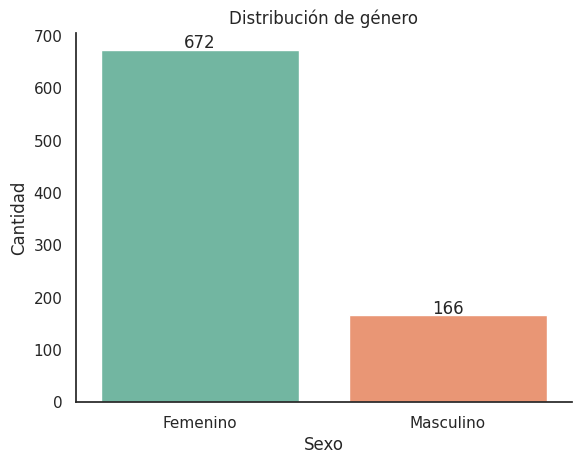

In [ ]:
# Establecer el tema de ggplot2 con un fondo blanco
sns.set(style="white")

# Crear el gráfico de barras utilizando ggplot2 y el tema theme_minimal()
ax = sns.countplot(x='Sexo', data=df, palette='Set2')


# Opcional: Agregar etiquetas y título al gráfico
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.title('Distribución de género')
# Eliminar el borde del gráfico
sns.despine()

# Agregar etiquetas a las barras sin decimales
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()  # Mostrar el gráfico

#### ¿Cuántas de las mujeres están embarazadas?


In [ ]:
df['Embarazada'] = df['Embarazada'].str.strip().replace('SI', 'Si')

In [ ]:
df['Sexo'].value_counts()

Femenino     672
Masculino    166
Name: Sexo, dtype: int64

In [ ]:
embarazadas = df[(df["Sexo"].str.strip() == "Femenino") & (df["Embarazada"].str.strip() == "Si")]


In [ ]:
embarazadas["Embarazada"].value_counts()

Si    8
Name: Embarazada, dtype: int64

<ipython-input-82-0bfcb4e5f28d>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Embarazadas', 'No embarazadas'], y=[conteo_embarazadas, conteo_no_embarazadas], palette='Set2', order=['No embarazadas', 'Embarazadas'])


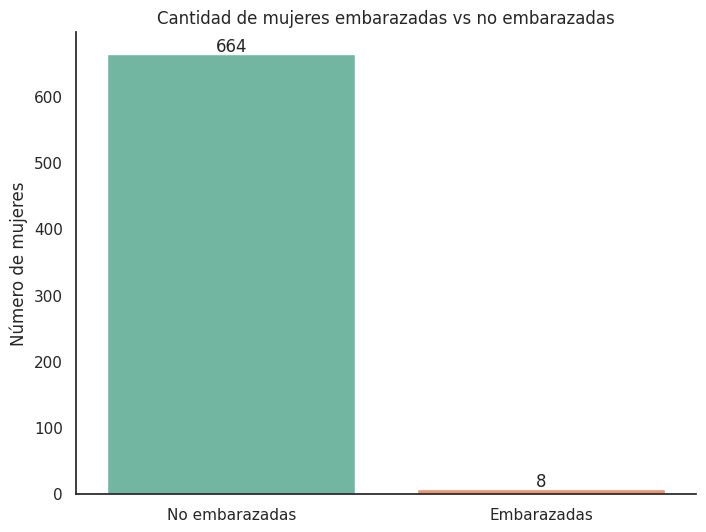

In [ ]:
# Filtrar solo las filas con 'Femenino'
df_mujeres = df[df['Sexo'] == 'Femenino']

# Configurar el estilo de ggplot2 en seaborn
sns.set(style="white")
sns.set_palette("Set2")


# Contar la cantidad de mujeres embarazadas y no embarazadas
conteo_embarazadas = df_mujeres[df_mujeres['Embarazada'] == 'Si'].shape[0]
conteo_no_embarazadas = df_mujeres[df_mujeres['Embarazada'] == 'No'].shape[0]


# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=['Embarazadas', 'No embarazadas'], y=[conteo_embarazadas, conteo_no_embarazadas], palette='Set2', order=['No embarazadas', 'Embarazadas'])
ax.set_title('Cantidad de mujeres embarazadas vs no embarazadas')
ax.set_ylabel('Número de mujeres')

# Eliminar el borde del gráfico
sns.despine()

# Agregar etiquetas a las barras sin decimales
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


#### Motivo

In [ ]:
df['Motivo'].value_counts()

 Seg. /Control de enfermedad           452
 Pesq. / Diagnóstico de enfermedad     386
Name: Motivo, dtype: int64

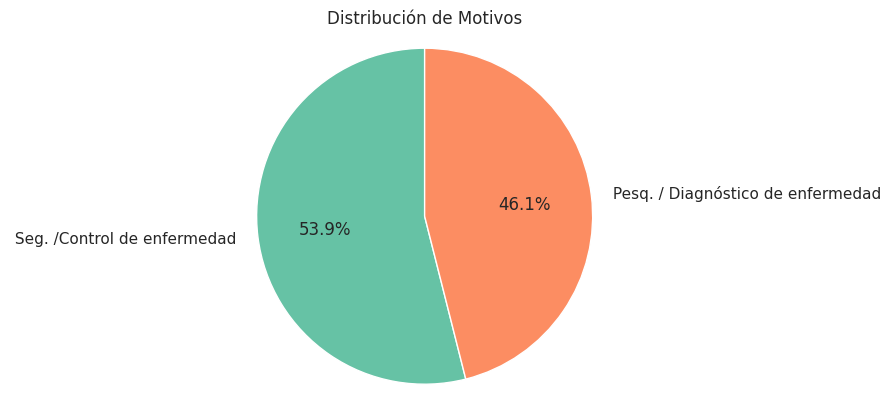

In [ ]:
count = df['Motivo'].value_counts()

# Selecciona una paleta de colores de seaborn (puedes elegir otra paleta si lo deseas)
colors = sns.color_palette('Set2')

# Crea el gráfico de pie con la paleta de colores personalizada
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=90, colors=colors)

# Opcional: Agrega un título al gráfico
plt.title('Distribución de Motivos')

plt.axis('equal')  # Hace que el gráfico de pie sea circular
plt.show()  # Muestra el gráfico


### Estado

In [ ]:
df['Estado'].value_counts()

 Distrito Capital     278
 La Guaira            167
 Miranda              112
 Táchira              100
 Zulia                 90
 Mérida                68
 Lara                  23
Name: Estado, dtype: int64

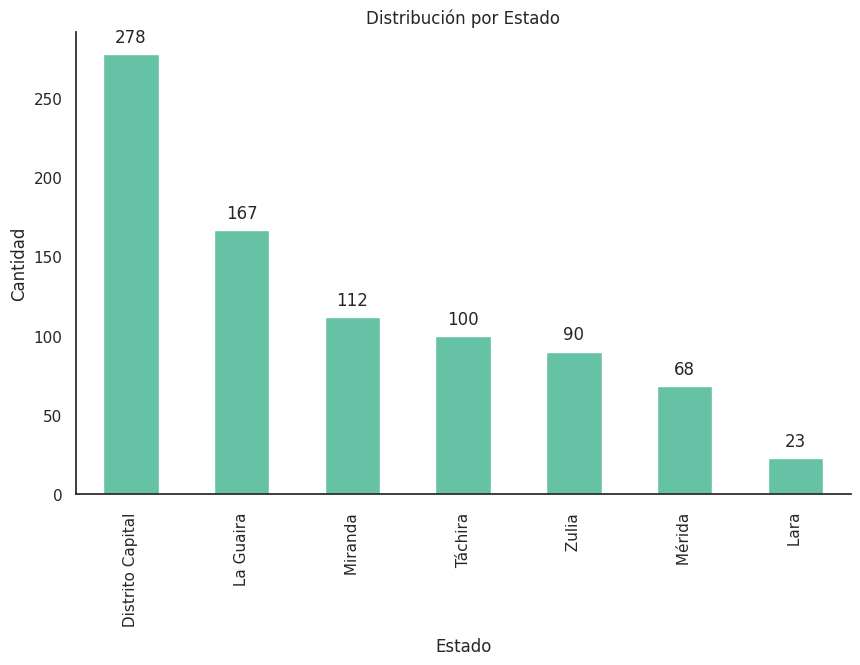

In [ ]:
estado_counts = df['Estado'].value_counts()

# Configura el estilo de seaborn con la paleta 'Set2'
sns.set(style="white", palette='Set2')

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))
estado_counts.plot(kind='bar')
plt.title('Distribución por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
sns.despine()

# Agrega etiquetas a las barras
for i, v in enumerate(estado_counts):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')

plt.show()

### Causa

In [ ]:
df['Causa'].value_counts()

 Reproductivas                         354
 Cardiovasculares                      216
 Tumor: Diag/Pesq.                      85
 Tumor (Cáncer): Eval/Control.          66
 Digestivas                             31
 Urinarias / Urológicas                 16
 Osteomusculares / Traumatológicas      15
 Virales / Infecciosas                  11
 Endocrinas                             10
 Garganta, oídos y nariz                 9
 Dermatológicas                          6
 Respiratorias                           5
 Cerebrovascular                         4
 Higado, pancreas, bazo                  3
 Otras                                   3
 Degenerativas / Nerviosas               2
 Autoinmunes                             1
 Oftalmológicas                          1
Name: Causa, dtype: int64

### Condición Laboral

In [ ]:
df['C_Laboral'].value_counts()

 Desocupado /Sin trabajo                                 392
 Trabajo Formal(empresa, organismo del estado, etc.)     206
 Oficios del Hogar                                       132
 Trabajo Infomal (a destajo, trabajo temporal)           108
Name: C_Laboral, dtype: int64

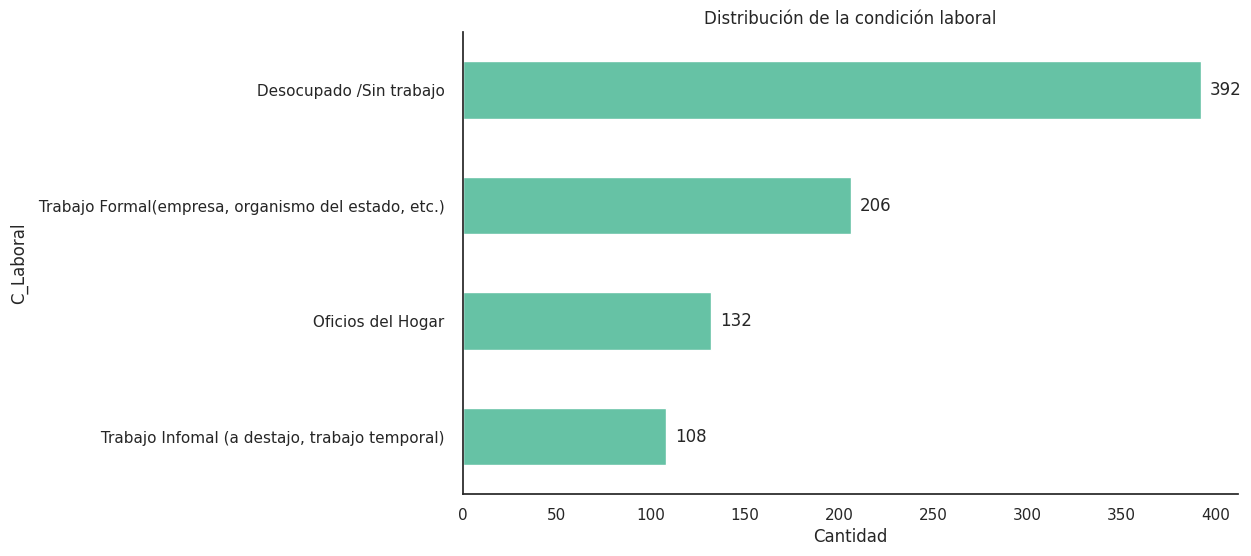

In [ ]:
c_laboral_counts = df['C_Laboral'].value_counts()

# Configura el estilo de seaborn con la paleta 'Set2'
sns.set(style="white", palette='Set2')

# Ordena los valores de mayor a menor
c_laboral_counts = c_laboral_counts.sort_values(ascending=True)

# Crea un gráfico de barras horizontales
plt.figure(figsize=(10, 6))
c_laboral_counts.plot(kind='barh')
plt.title('Distribución de la condición laboral')
plt.xlabel('Cantidad')
plt.ylabel('C_Laboral')
sns.despine()

# Agrega etiquetas a las barras horizontales
for i, v in enumerate(c_laboral_counts):
    plt.text(v + 5, i, str(v), ha='left', va='center')

plt.show()

## Cuantitativas

#### Porcentaje

In [ ]:
df['Porcentaje'].value_counts()

100    813
75      18
50       6
25       1
Name: Porcentaje, dtype: int64

<ipython-input-91-753ad1e3c2e2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Porcentaje', data=df, palette='Set2', order=df['Porcentaje'].value_counts().index)


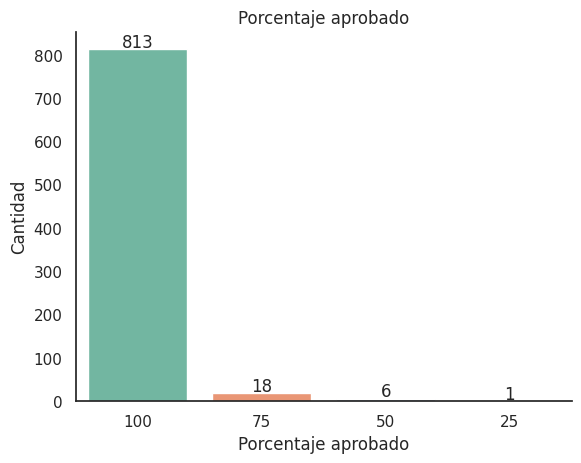

In [ ]:
# Establecer el tema de ggplot2 con un fondo blanco
sns.set(style="white")

# Crear el gráfico de barras utilizando ggplot2 y el tema theme_minimal()
ax = sns.countplot(x='Porcentaje', data=df, palette='Set2', order=df['Porcentaje'].value_counts().index)


# Opcional: Agregar etiquetas y título al gráfico
plt.xlabel('Porcentaje aprobado')
plt.ylabel('Cantidad')
plt.title('Porcentaje aprobado')
# Eliminar el borde del gráfico
sns.despine()

# Agregar etiquetas a las barras sin decimales
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()  # Mostrar el gráfico

#### Edades

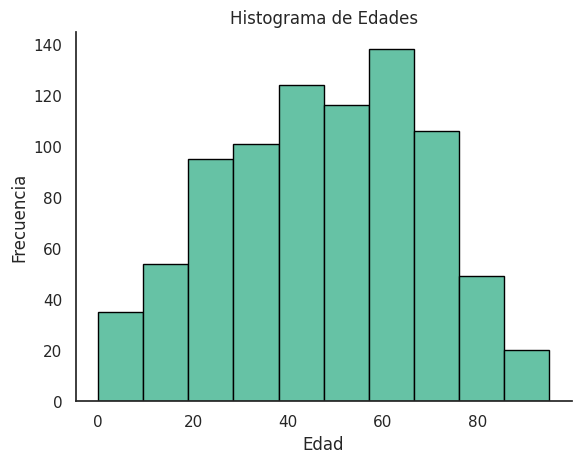

In [ ]:
edades = df['Edad']

# Configura el estilo de seaborn (opcional)
sns.set(style="white")

# Selecciona la paleta de colores 'pastel' de seaborn
colors = sns.color_palette('Set2')

# Crea el histograma utilizando la paleta de colores personalizada
plt.hist(edades, bins=10, color=colors[0], edgecolor='black')
sns.despine()

# Agrega etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades')




# Muestra el histograma
plt.show()


### Hogar

In [ ]:
df['Hogar'].value_counts()

3     179
4     167
2     134
5     125
6      68
1      68
7      47
8      23
9       7
10      5
12      4
15      3
11      3
20      2
16      1
13      1
14      1
Name: Hogar, dtype: int64

### Monto Facturado

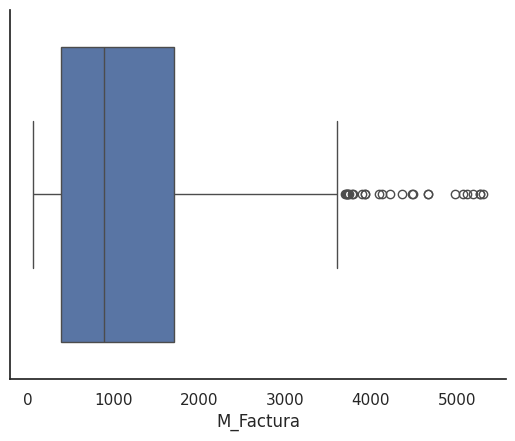

In [ ]:
sns.boxplot(data=df, x='M_Factura')
sns.despine()

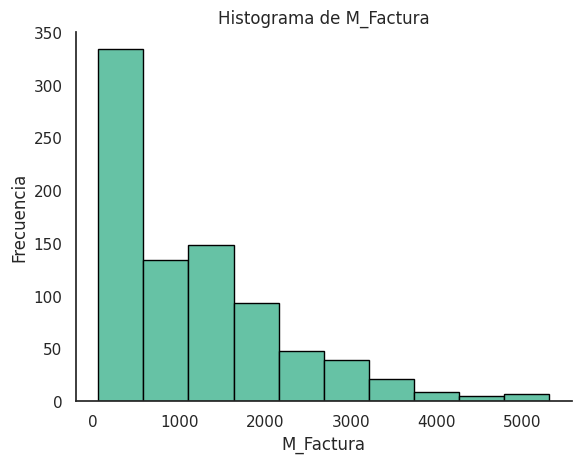

In [ ]:
factura = df['M_Factura']

# Configura el estilo de seaborn (opcional)
sns.set(style="white")

# Selecciona la paleta de colores 'pastel' de seaborn
colors = sns.color_palette('Set2')

# Crea el histograma utilizando la paleta de colores personalizada
plt.hist(factura, bins=10, color=colors[0], edgecolor='black')
sns.despine()

# Agrega etiquetas y título
plt.xlabel('M_Factura')
plt.ylabel('Frecuencia')
plt.title('Histograma de M_Factura')




# Muestra el histograma
plt.show()


#### M_Aportado

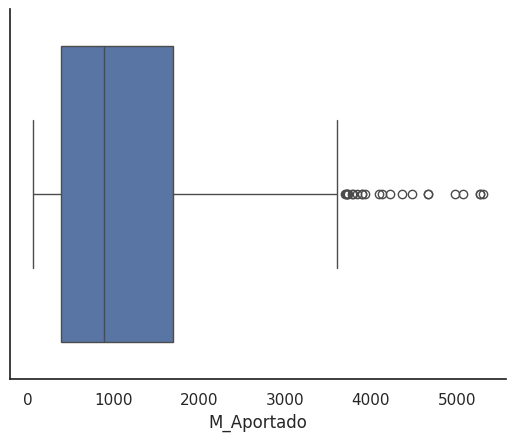

In [ ]:
sns.boxplot(data=df, x='M_Aportado')
sns.despine()

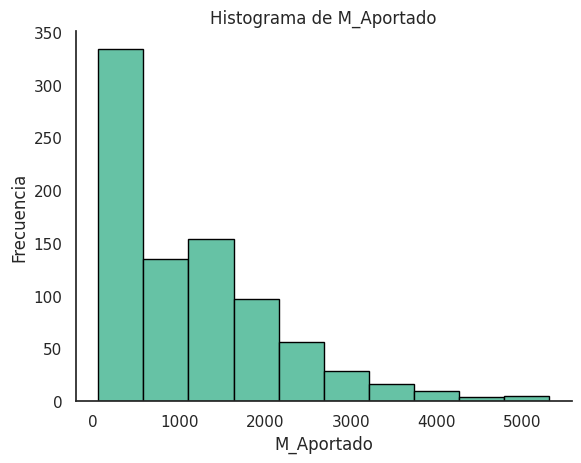

In [ ]:
aportado = df['M_Aportado']

# Configura el estilo de seaborn (opcional)
sns.set(style="white")

# Selecciona la paleta de colores 'pastel' de seaborn
colors = sns.color_palette('Set2')

# Crea el histograma utilizando la paleta de colores personalizada
plt.hist(aportado, bins=10, color=colors[0], edgecolor='black')
sns.despine()

# Agrega etiquetas y título
plt.xlabel('M_Aportado')
plt.ylabel('Frecuencia')
plt.title('Histograma de M_Aportado')




# Muestra el histograma
plt.show()


### M_USD

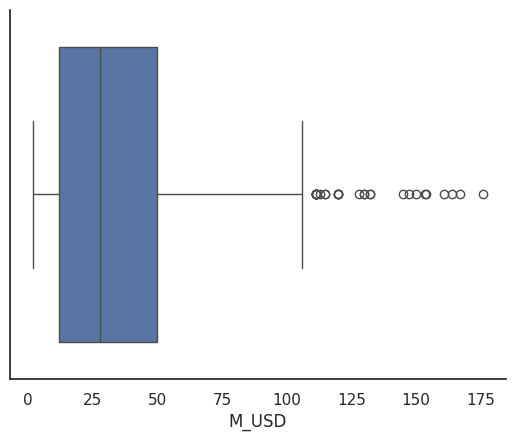

In [ ]:
sns.boxplot(data=df, x='M_USD')
sns.despine()

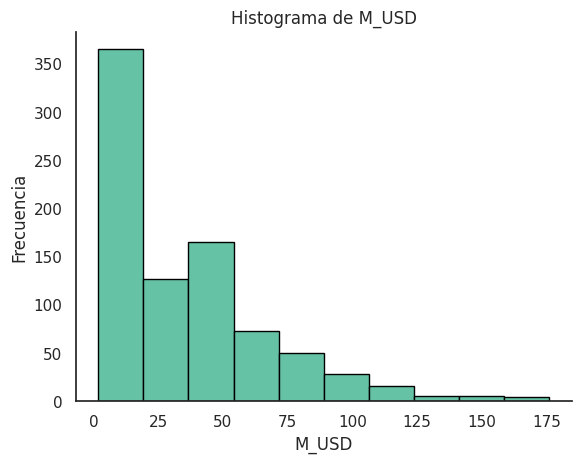

In [ ]:
dolares = df['M_USD']

# Configura el estilo de seaborn (opcional)
sns.set(style="white")

# Selecciona la paleta de colores 'pastel' de seaborn
colors = sns.color_palette('Set2')

# Crea el histograma utilizando la paleta de colores personalizada
plt.hist(dolares, bins=10, color=colors[0], edgecolor='black')
sns.despine()

# Agrega etiquetas y título
plt.xlabel('M_USD')
plt.ylabel('Frecuencia')
plt.title('Histograma de M_USD')




# Muestra el histograma
plt.show()


#### Hogar

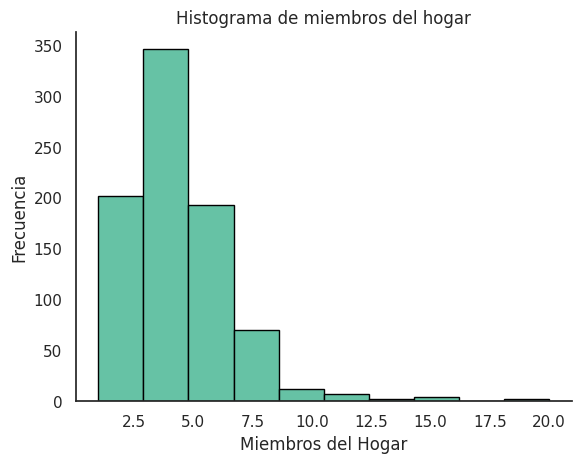

In [ ]:
hogar = df['Hogar']

# Configura el estilo de seaborn (opcional)
sns.set(style="white")

# Selecciona la paleta de colores 'pastel' de seaborn
colors = sns.color_palette('Set2')

# Crea el histograma utilizando la paleta de colores personalizada
plt.hist(hogar, bins=10, color=colors[0], edgecolor='black')
sns.despine()

# Agrega etiquetas y título
plt.xlabel('Miembros del Hogar')
plt.ylabel('Frecuencia')
plt.title('Histograma de miembros del hogar')




# Muestra el histograma
plt.show()


In [ ]:
df["Hogar"].mode()

0    3
Name: Hogar, dtype: int64

## Medidas de Tendencia Central


### Media

In [ ]:
df.mean()

<ipython-input-102-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Porcentaje          99.015513
M_Factura         1186.436897
M_Aportado        1154.829714
M_USD               36.415955
Veces atendido       1.000000
Edad                47.250597
Hogar                4.068019
dtype: float64

### Mediana

In [ ]:
df.median()

<ipython-input-103-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Porcentaje        100.000
M_Factura         893.000
M_Aportado        891.425
M_USD              28.000
Veces atendido      1.000
Edad               48.000
Hogar               4.000
dtype: float64

### Moda

In [ ]:
df.mode().head(1)

,Mes,Tipo,Cedula,Solicitante,Porcentaje,M_Factura,M_Aportado,M_USD,Veces atendido,Sexo,...,C_Laboral,Motivo,Causa,Exámen 1,Exámen 2,Exámen 3,Exámen 4,Exámen 5,Exámen 6,Exámen 7
0,SEPTIEMBRE,V-,"15,175,593",AARON ENRIQUE VIVAS GUILLEN,100.0,303.0,303.0,50.0,1.0,Femenino,...,Desocupado /Sin trabajo,Seg. /Control de enfermedad,Reproductivas,BIOPSIA (Bs),BIOPSIA (Bs),CONSULTAS (Bs.),Ginecología,CONSULTAS (Bs.),Ginecología,ELECTROCARDIOGRAMA (Bs.)


In [ ]:
df["Edad"].mode()

0    62
Name: Edad, dtype: int64

## Medidas de Dispersión

In [ ]:
df.describe(include=[np.number])

,Porcentaje,M_Factura,M_Aportado,M_USD,Veces atendido,Edad,Hogar
count,838.000000,838.000000,838.000000,838.000000,838.0,838.000000,838.000000
mean,99.015513,1186.436897,1154.829714,36.415955,1.0,47.250597,4.068019
std,6.091967,1014.175800,964.237218,30.701612,0.0,21.260780,2.310726
min,25.000000,59.010000,59.010000,1.870000,1.0,0.000000,1.000000
25%,100.000000,387.480000,387.480000,12.000000,1.0,31.000000,3.000000
50%,100.000000,893.000000,891.425000,28.000000,1.0,48.000000,4.000000
75%,100.000000,1701.000000,1699.500000,50.000000,1.0,63.000000,5.000000
max,100.000000,5310.660000,5310.660000,176.000000,1.0,95.000000,20.000000


In [ ]:
# Crear el pairplot
sns.pairplot(df)

# Mostrar el gráfico
plt.show()

### ¿Cuál es el máximo?

In [ ]:
df.max(numeric_only=True)

### ¿Cuál es el mínimo?

In [ ]:
df.min(numeric_only=True)

### Rango

In [ ]:
df.max(numeric_only=True)-df.min(numeric_only=True)

### Desviación Estándar

In [ ]:
df.std()

### Rango cuartílico

In [ ]:
df.quantile(q=[0.75,0.50,0.25]).transpose()

In [ ]:
df.quantile(q=[0.75,0.50,0.25]).transpose().rename_axis('variable').reset_index().assign(iqr= lambda df: df[0.75]-df[0.25])

## Medidas de Forma

In [ ]:
df.skew()

In [ ]:
df.kurtosis()

<ipython-input-115-c7edf97eb14c>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurtosis()


Porcentaje        58.700190
M_Factura          1.822304
M_Aportado         1.978551
M_USD              2.133965
Veces atendido     0.000000
Edad              -0.791900
Hogar              7.958398
dtype: float64

## Medidas de Posición

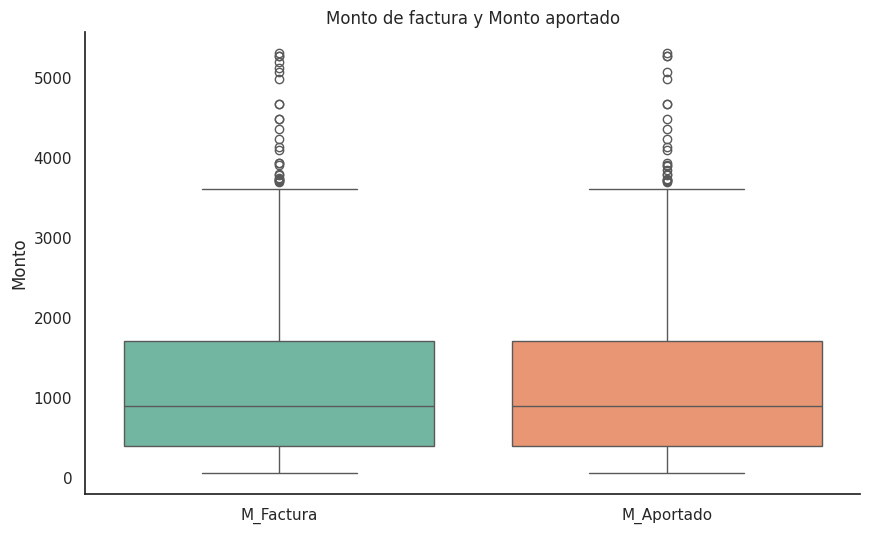

In [ ]:
columnas_seleccionadas = df[['M_Factura', 'M_Aportado']]

# Visualizar un boxplot para las columnas seleccionadas
sns.set(style="white")
plt.figure(figsize=(10, 6))
sns.boxplot(data=columnas_seleccionadas, palette='Set2')
plt.title('Monto de factura y Monto aportado')
plt.ylabel('Monto')
sns.despine()
plt.show()

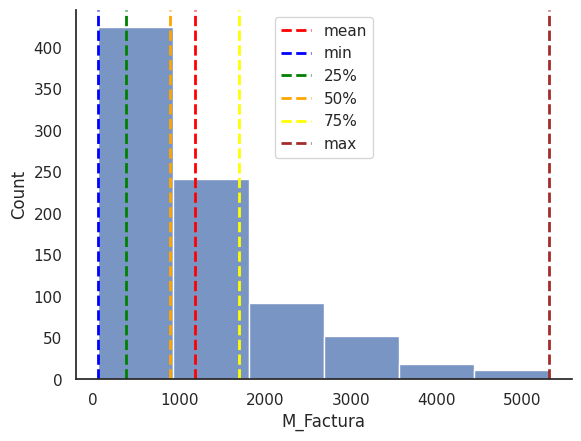

In [ ]:
sns.histplot(
        data=df,
        x='M_Factura',
        bins=6)

colors = ['red', 'blue', 'green', 'orange', 'yellow', 'brown']
df_metrics = df.describe()[['M_Factura']].transpose()

i = 0
for metric in df_metrics.columns:
    if metric != 'std' and metric != 'count':
        plt.axvline(x=df_metrics[metric].values,
                    color=colors[i],
                    label=metric,
                    linestyle='dashed',
                    linewidth = 2)
        i = i+1
    else: pass
sns.despine()
plt.legend()

## Análisis Bivariante

<Axes: xlabel='Edad', ylabel='M_Factura'>

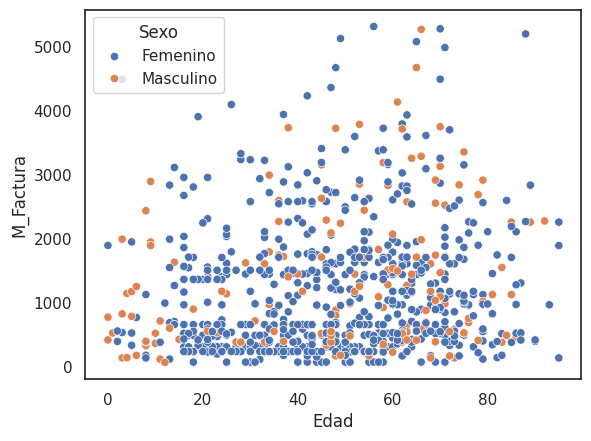

In [ ]:
sns.scatterplot(data=df, x='Edad', y='M_Factura', hue= 'Sexo')

<Axes: xlabel='Edad', ylabel='M_Factura'>

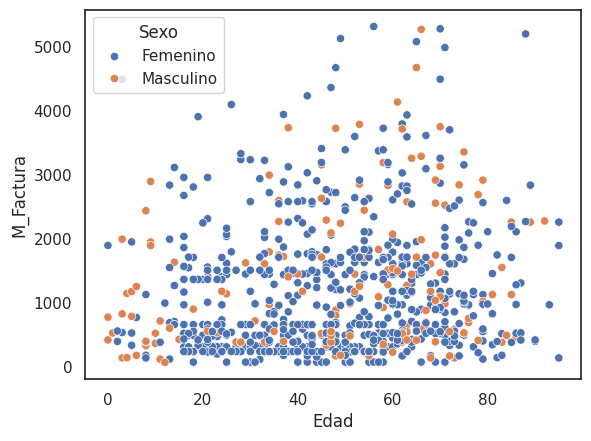

In [ ]:
sns.scatterplot(data=df, x='Edad', y='M_Factura', hue='Sexo')

<Axes: xlabel='Edad', ylabel='M_USD'>

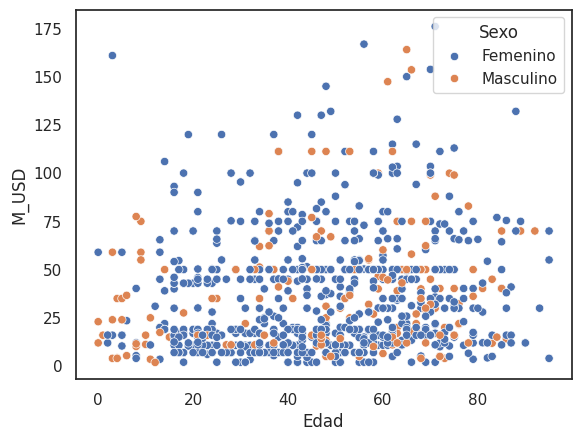

In [ ]:
sns.scatterplot(data=df, x='Edad', y='M_USD', hue='Sexo')

<Axes: xlabel='Edad', ylabel='M_USD'>

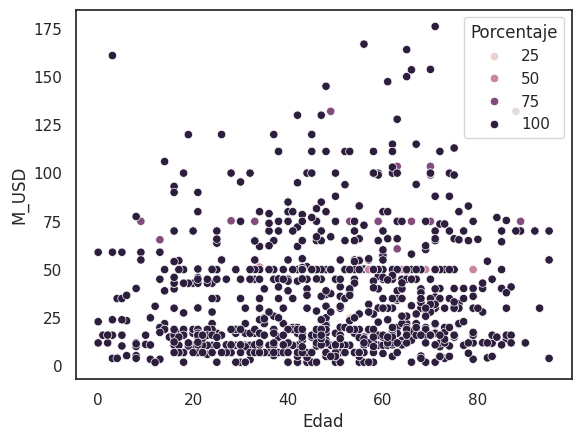

In [ ]:
sns.scatterplot(data=df, x='Edad', y='M_USD', hue='Porcentaje')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ' Distrito Capital '),
  Text(1, 0, ' Miranda '),
  Text(2, 0, ' La Guaira '),
  Text(3, 0, ' Táchira '),
  Text(4, 0, ' Zulia '),
  Text(5, 0, ' Lara '),
  Text(6, 0, ' Mérida ')])

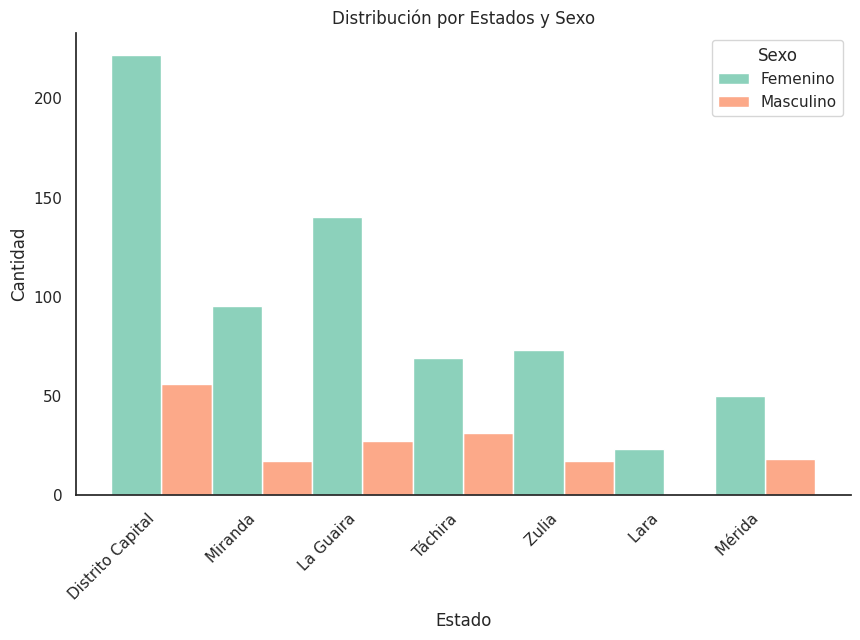

In [ ]:
sns.set(style="white", palette="Set2")

# Crea un gráfico de barras con múltiples categorías
plt.figure(figsize=(10, 6))
plt.title('Distribución por Estados y Sexo')
plt.ylabel('Cantidad')

#binwidth = 10
sns.histplot(data=df, x='Estado', hue='Sexo', palette='Set2', multiple='dodge')
sns.despine()

# Ajusta la rotación de las etiquetas del eje x
plt.xticks(rotation=45, ha='right')

En Lara, los hombres no han pedido ayudas

<Axes: xlabel='M_Aportado', ylabel='M_Factura'>

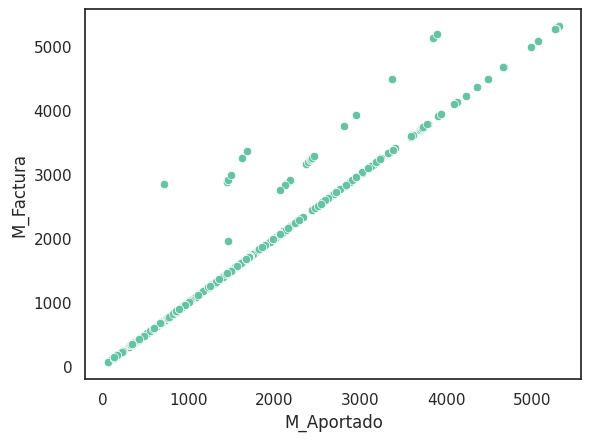

In [ ]:
sns.scatterplot(data=df, x='M_Aportado', y='M_Factura')

<Axes: xlabel='M_Aportado', ylabel='M_Factura'>

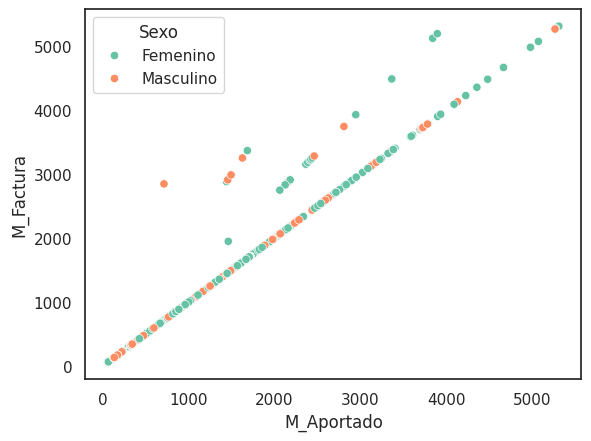

In [ ]:
sns.scatterplot(data=df, x='M_Aportado', y='M_Factura', hue = 'Sexo')

In [ ]:
df.columns

Index(['Mes', 'Tipo', 'Cedula', 'Solicitante', 'Porcentaje', 'M_Factura',
       'M_Aportado', 'M_USD', 'Veces atendido', 'Sexo', 'Edad', 'Rango_Edad',
       'Estado', 'Embarazada', 'Hogar', 'C_Laboral', 'Motivo', 'Causa',
       'Exámen 1', 'Exámen 2', 'Exámen 3', 'Exámen 4', 'Exámen 5', 'Exámen 6',
       'Exámen 7'],
      dtype='object')

In [ ]:

sns.set(style="white", palette="Set2")

# Crea un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sexo', y='M_Factura', palette='Set2')
plt.title('Relación entre Sexo y Monto de Factura')
plt.xlabel('Sexo')
sns.despine()
plt.ylabel('Monto')
plt.show()


In [ ]:

sns.set(style="white", palette="Set2")

# Crea un violin plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Rango_Edad', y='M_Factura', palette='Set2')
plt.title('Relación entre Rango de Edad y Monto de Factura')
plt.xlabel('Rango de Edad')
sns.despine()
plt.ylabel('Monto de Factura')
plt.show()


In [ ]:
sns.set(style="white", palette="Set2")

# Crea un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Motivo', y='M_Factura', palette='Set2')
plt.title('Relación entre Motivo y Monto de Factura')
plt.xlabel('Motivo')
sns.despine()
plt.ylabel('Monto')
plt.show()


In [ ]:
# Filtrar solo las columnas cuantitativas
df_cuantitativas = df.select_dtypes(include='number')

# Excluir la columna "Veces atendido" si existe
column_to_exclude = "Veces atendido"
if column_to_exclude in df_cuantitativas.columns:
    df_cuantitativas = df_cuantitativas.drop(columns=[column_to_exclude])

# Configurar el estilo de ggplot2 en seaborn
sns.set_theme(style="whitegrid")
sns.set_palette("Set2")

# Crear una matriz de distplot para todas las columnas cuantitativas
plt.figure(figsize=(12, 10))
sns.pairplot(df_cuantitativas, kind='kde', palette='Set2')

# Mostrar el gráfico
plt.show()

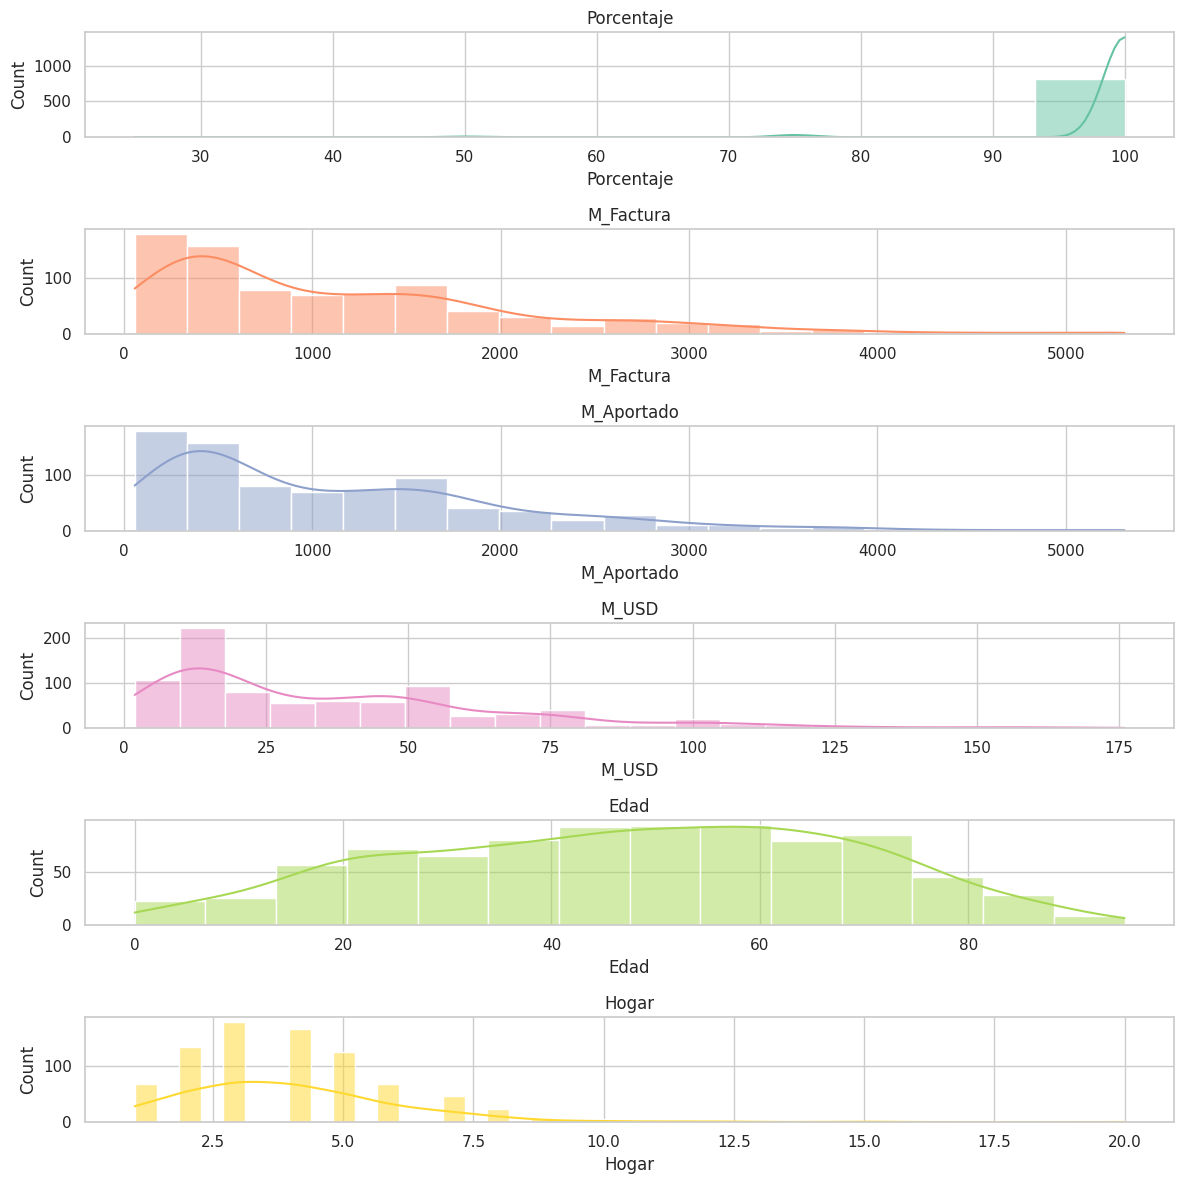

In [ ]:
df_cuantitativas = df.select_dtypes(include='number')

# Excluir la columna "Veces atendido" si existe
column_to_exclude = "Veces atendido"
if column_to_exclude in df_cuantitativas.columns:
    df_cuantitativas = df_cuantitativas.drop(columns=[column_to_exclude])

# Configurar el estilo de ggplot2 en seaborn
sns.set_theme(style="whitegrid")
sns.set_palette("Set2")

# Configurar subgráficos
fig, axes = plt.subplots(nrows=len(df_cuantitativas.columns), figsize=(12, 2 * len(df_cuantitativas.columns)))

# Crear histogramas para cada variable cuantitativa
for i, column in enumerate(df_cuantitativas.columns):
    sns.histplot(df_cuantitativas[column], kde=True, color=sns.color_palette("Set2")[i], ax=axes[i])
    axes[i].set_title(column)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
# Seleccionar las columnas de interés
columnas_cuantitativas = ["M_Aportado", "M_USD", "Edad"]
columnas_cualitativas = ["Sexo", "Estado", "C_Laboral", "Motivo"]

# Configurar el estilo de ggplot2 en seaborn
sns.set_theme(style="whitegrid")
sns.set_palette("Set2")

# Crear subgráficos para box plots
fig, axs = plt.subplots(nrows=len(columnas_cuantitativas) + len(columnas_cualitativas), figsize=(15, 12))

# Box plots para variables cuantitativas
for i, columna in enumerate(columnas_cuantitativas):
    sns.boxplot(x=df[columna], ax=axs[i], palette="Set2")
    axs[i].set_title(f'Box Plot de {columna}')

# Box plots para variables cualitativas
for i, columna in enumerate(columnas_cualitativas):
    sns.boxplot(x=df[columna], y=df["M_Aportado"], ax=axs[i+len(columnas_cuantitativas)], palette="Set2")
    axs[i+len(columnas_cuantitativas)].set_title(f'Box Plot de M_Aportado por {columna}')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
# Asumiendo que tu DataFrame ya está definido como df

# Seleccionar las columnas cuantitativas de interés
columnas_cuantitativas = ["Edad", "Hogar", "M_Factura", "M_Aportado", "M_USD"]

# Configurar el estilo de ggplot2 en seaborn
sns.set_theme(style="whitegrid")
sns.set_palette("Set2")

# Crear gráficos de caja por separado para cada variable cuantitativa
plt.figure(figsize=(15, 10))
for i, columna in enumerate(columnas_cuantitativas):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[columna], palette="Set2")
    plt.title(f'Box Plot de {columna}')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
columnas_cuantitativas = ["Edad", "Hogar", "M_Factura", "M_Aportado", "M_USD"]

# Configurar el estilo de ggplot2 en seaborn
sns.set_theme(style="whitegrid")
sns.set_palette("Set2")

# Crear gráficos de caja horizontales apilados uno debajo del otro para cada variable cuantitativa
plt.figure(figsize=(8, 10))
for i, columna in enumerate(columnas_cuantitativas):
    plt.subplot(5, 1, i+1)
    sns.boxplot(x=df[columna], palette="Set2", orient="h")
    plt.title(f'Box Plot de {columna}')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()